In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
# import math
import numpy as np
# import xgboost as xgb
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./raw_data/20221026/df.ami.daily.csv")
# df = df[df["year"] <= 2019]
train_len = int(len(df) * .8)
test = df[train_len:]
df = df[:train_len]
# df = df[df["ischemic"] == 1]


In [4]:
len(df)

2044

In [5]:
df.dtypes

Unnamed: 0                        int64
Attendance.Date..yyyy.mm.dd.     object
n                                 int64
year                              int64
month                             int64
Day                               int64
Mean (deg. C)                   float64
Mean Relative Humidity (%)        int64
CO                              float64
FSP                             float64
NO2                             float64
NOX                             float64
O3                              float64
RSP                             float64
SO2                             float64
total                             int64
dtype: object

In [6]:
df.drop(["Unnamed: 0", "year", "month", "Day", "Attendance.Date..yyyy.mm.dd."], axis = 1).dtypes
df[["n"]].dtypes

n    int64
dtype: object

In [7]:
# from sklearn import preprocessing 
# lbl = preprocessing.LabelEncoder() 
# df_asthma_ind['Sex'] = lbl.fit_transform(df_asthma_ind['Sex'].astype(str))

# automl

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "15" 2020-09-15; Java(TM) SE Runtime Environment (build 15+36-1562); Java HotSpot(TM) 64-Bit Server VM (build 15+36-1562, mixed mode, sharing)
  Starting server from /Users/ytf1997/miniconda3/envs/ML_learn/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/qj/hf26mvwj06q4f45ybdkdprgw0000gn/T/tmp3oqu2u7b
  JVM stdout: /var/folders/qj/hf26mvwj06q4f45ybdkdprgw0000gn/T/tmp3oqu2u7b/h2o_ytf1997_started_from_python.out
  JVM stderr: /var/folders/qj/hf26mvwj06q4f45ybdkdprgw0000gn/T/tmp3oqu2u7b/h2o_ytf1997_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,11 secs
H2O_cluster_timezone:,Asia/Hong_Kong
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,2 months and 24 days
H2O_cluster_name:,H2O_from_python_ytf1997_l69d8d
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [9]:
df = h2o.H2OFrame(df)
test = h2o.H2OFrame(test)
# df["n"] = df["n"].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
aml = H2OAutoML(max_models = 10, seed=1, max_runtime_secs = 120, 
                exclude_algos = ["GLM"],
#                 monotone_constraints = {"total" : 1})
               monotone_constraints = {"FSP" : 1, "RSP" : 1, "SO2" : 1, "O3" : 1, "NO2" : 1, "NOX" : 1, "total" : 1})
#                 monotone_constraints = {"FSP" : 1, "RSP" : 1, "SO2" : 1, "O3" : 1, "NO2" : 1, "NOX" : 1})

In [11]:
aml.train(x = [
    "FSP", "RSP", "SO2", "O3", "NO2", "NOX",
               "total", 
               "Mean (deg. C)", "Mean Relative Humidity (%)"
], 
         
         y = "n",
         training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20221028_102406

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 19.204958499553943
RMSE: 4.382346232277174
MAE: 3.5018509368191673
RMSLE: 0.15784064870013542
R^2: 0.6080700720446386
Mean Residual Deviance: 19.204958499553943
Null degrees of freedom: 2043
Residual degrees of freedom: 2036
Null deviance: 100158.04452054763
Residual deviance: 39254.935173088255
AIC: 11858.985139532693

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 33.109632724610016
RMSE: 5.7540970381642
MAE: 4.600009354571877
RMSLE: 0.203388400763162
R^2: 0.3243070028666669
Mean Residual Deviance: 33.109632724610016
Null degrees of freedom: 2043
Residual degrees of freedom: 2037
Null deviance: 100225.10268995247

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,4.604947,0.126986,4.406948,4.753675,4.622676,4.655114,4.586323
1,mean_residual_deviance,33.167526,1.207910,31.555720,34.680780,33.702820,32.416980,33.481335
2,mse,33.167526,1.207910,31.555720,34.680780,33.702820,32.416980,33.481335
3,null_deviance,20045.021000,847.743900,20551.182000,20876.176000,20538.926000,19188.705000,19070.115000
4,r2,0.322012,0.021624,0.354399,0.326468,0.322253,0.311020,0.295919
5,residual_deviance,13554.999000,404.249020,13190.291000,14045.716000,13919.264000,13193.712000,13426.015000
6,rmse,5.758359,0.105028,5.617448,5.889039,5.805413,5.693591,5.786306
7,rmsle,0.203579,0.005507,0.194331,0.208509,0.206222,0.203166,0.205665


# XAI inspection

In [12]:
best_model = aml.get_best_model()

In [17]:
plt.rcParams.update({'font.size': 40})

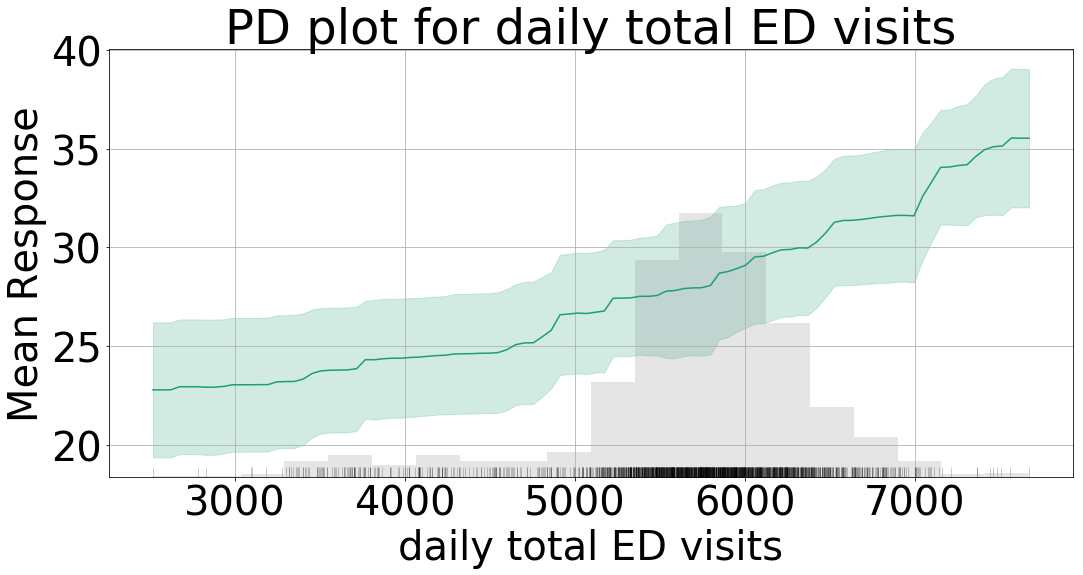

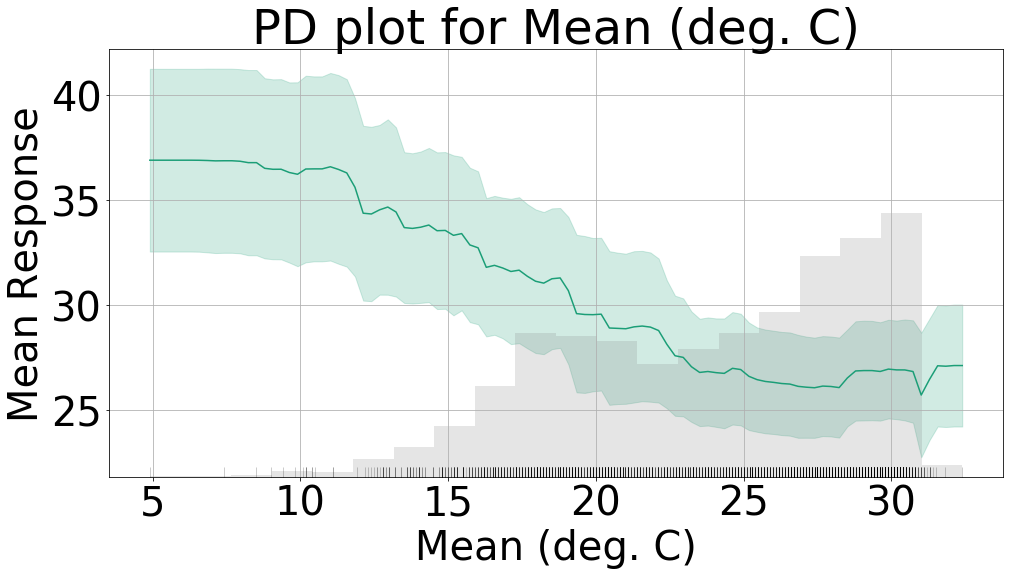

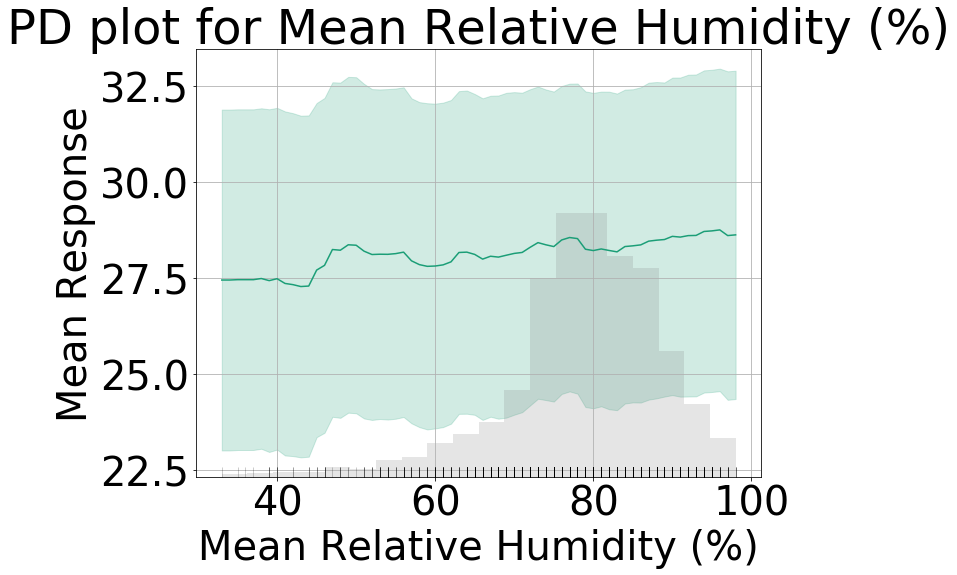

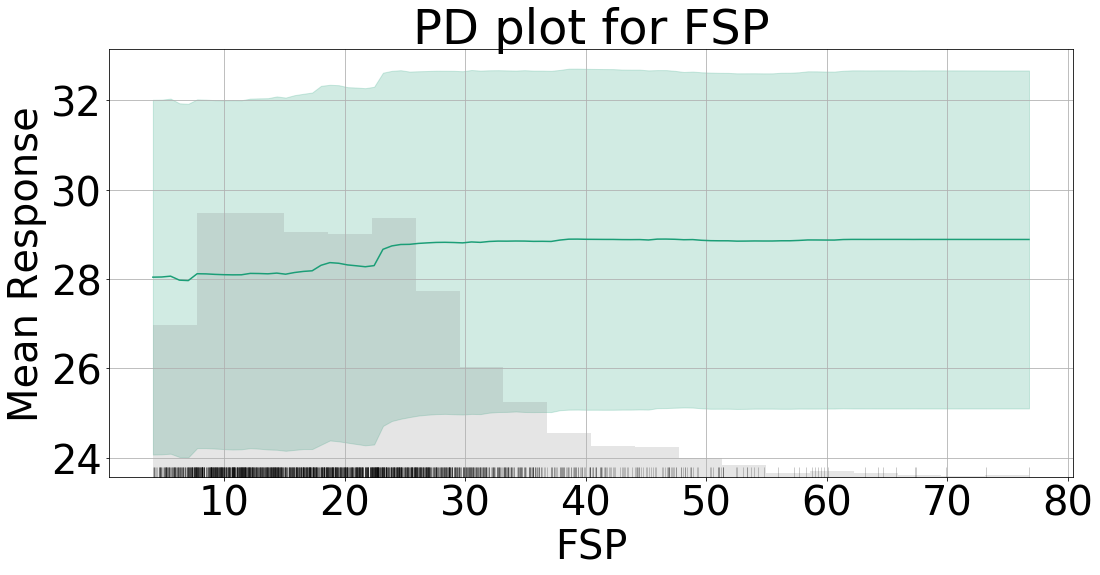

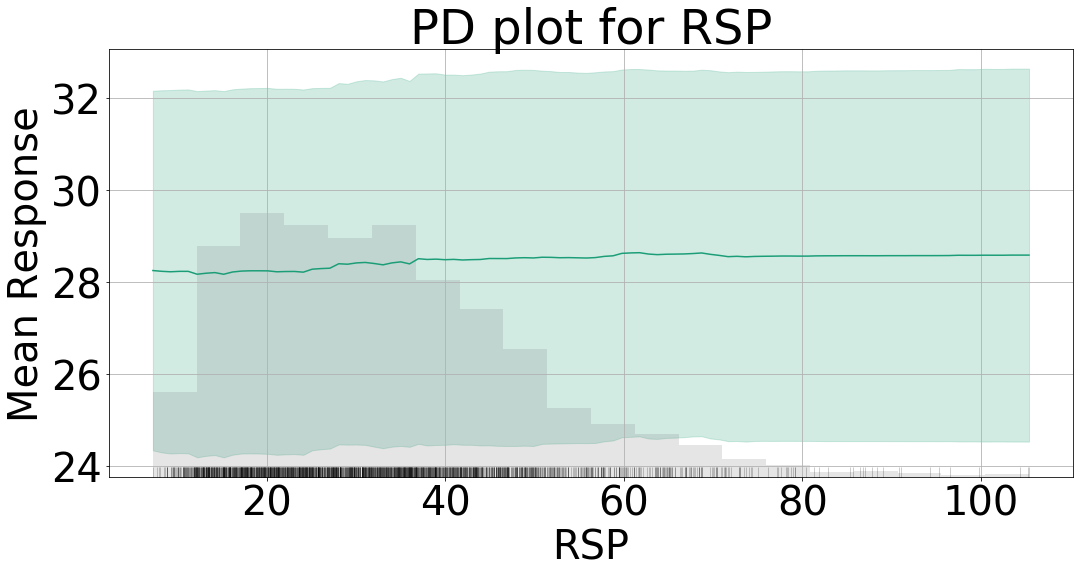

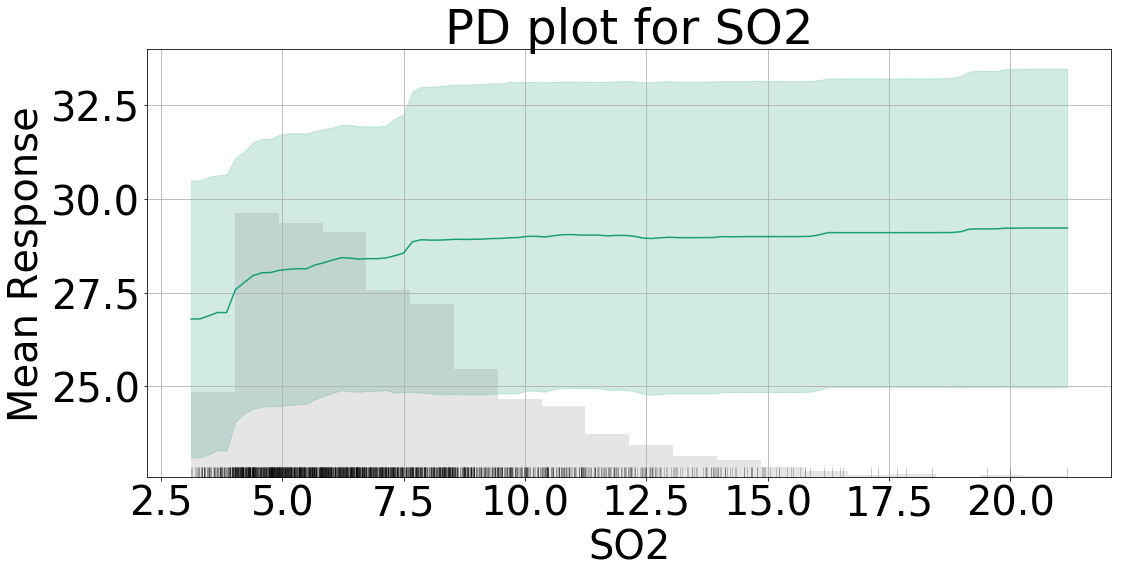

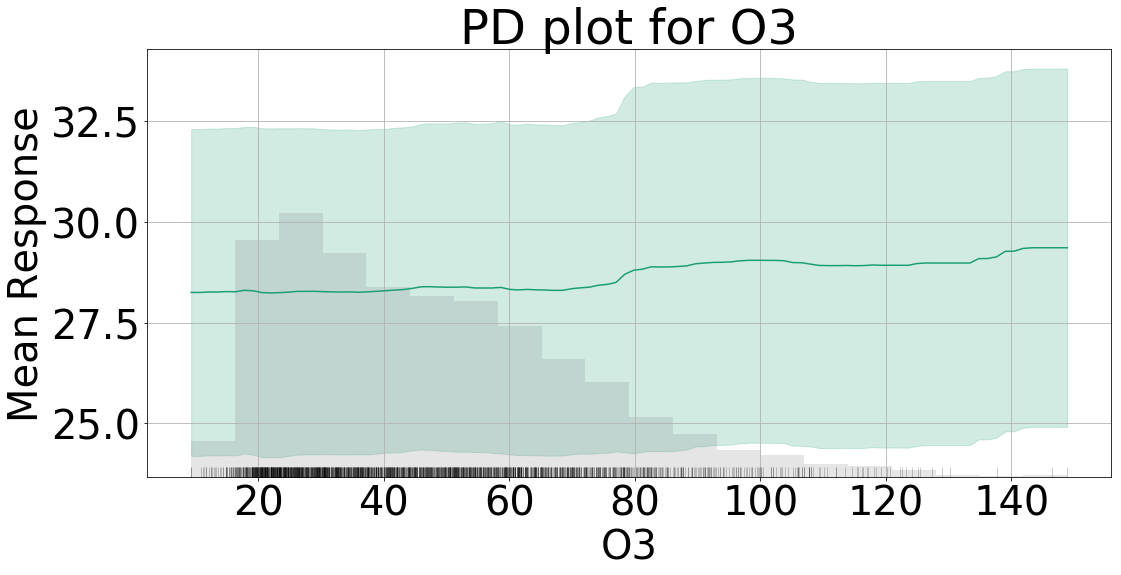

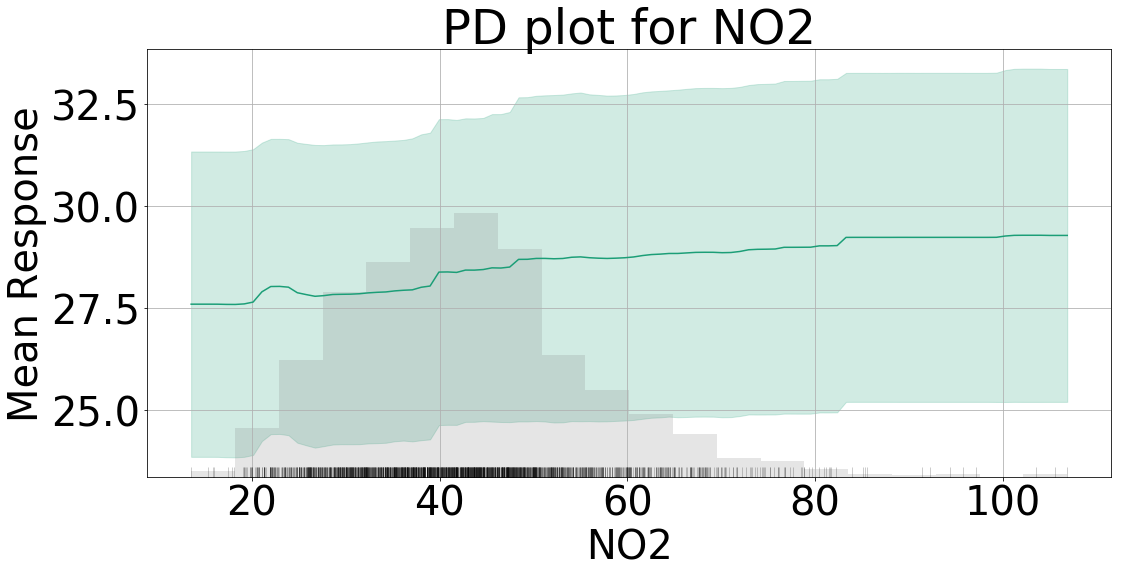

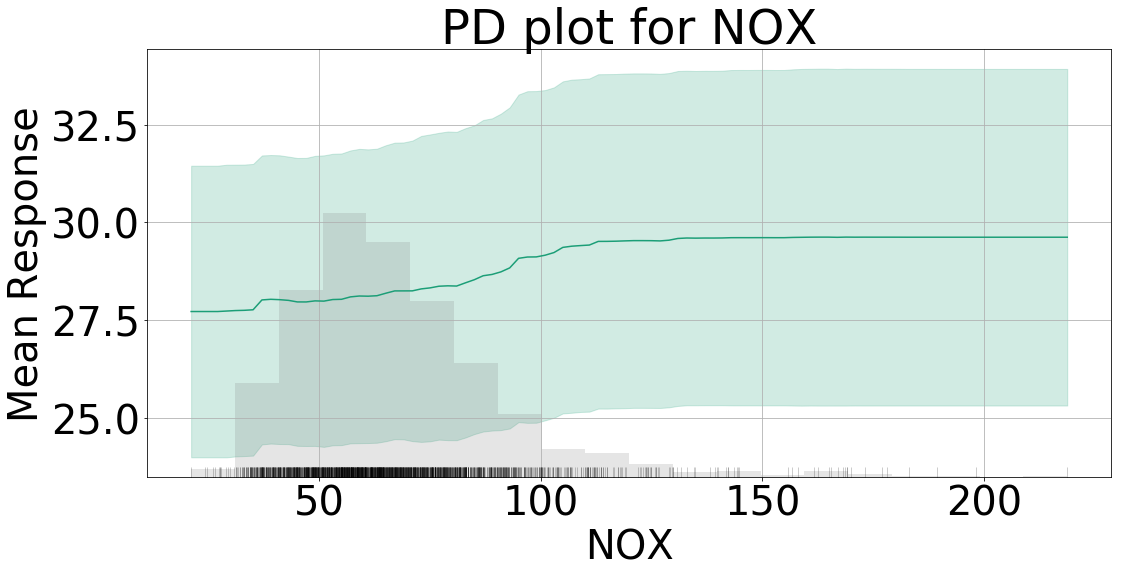

In [18]:
for var in ["total", 
               "Mean (deg. C)", "Mean Relative Humidity (%)",
            "FSP", "RSP", "SO2", "O3", "NO2", "NOX",]:
    best_model.pd_plot(df, var)
    if var == "total":
        var = "daily total ED visits"
        plt.xlabel(var)
    plt.title("PD plot for " + var)
    plt.savefig("./results/ami." + var + ".png")

# predictions

In [14]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [15]:
mean_squared_error(test["n"].as_data_frame(), preds.as_data_frame(), squared = False)

5.721191100114046

Text(0, 0.5, 'preds')

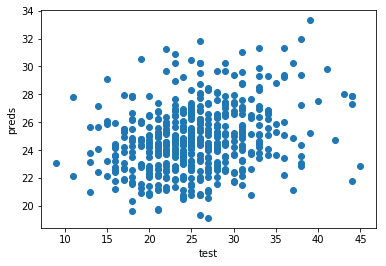

In [16]:
plt.scatter(test["n"].as_data_frame(), preds.as_data_frame())
plt.xlabel("test")
plt.ylabel("preds")

In [160]:
best_model = aml.get_best_model()
# best_model.explain(frame = df)

In [59]:
# import pickle
# with open("./results/cardiac_arrest.daily.pickle", "wb") as handle:
#     pickle.dump(aml, handle)

# leaderboard

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_Monotonic_1_AutoML_7_20221027_142343,3.45038,11.9051,2.71696,0.338916,11.9051,123,0.007701,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_7_20221027_142343,3.45705,11.9512,2.71772,0.339476,11.9512,233,0.018964,StackedEnsemble
GBM_1_AutoML_7_20221027_142343,3.4588,11.9633,2.72281,0.339045,11.9633,51,0.004361,GBM
GBM_2_AutoML_7_20221027_142343,3.46567,12.0109,2.71921,0.339512,12.0109,44,0.004089,GBM
GBM_5_AutoML_7_20221027_142343,3.47085,12.0468,2.73021,0.340056,12.0468,57,0.003779,GBM
StackedEnsemble_BestOfFamily_1_AutoML_7_20221027_142343,3.4713,12.0499,2.72467,0.340002,12.0499,233,0.013861,StackedEnsemble
GBM_3_AutoML_7_20221027_142343,3.47701,12.0896,2.72356,0.340095,12.0896,44,0.004072,GBM
GBM_4_AutoML_7_20221027_142343,3.47902,12.1035,2.7229,0.340511,12.1035,61,0.004134,GBM
DRF_1_AutoML_7_20221027_142343,3.53761,12.5147,2.77334,0.346038,12.5147,280,0.012999,DRF
XRT_1_AutoML_7_20221027_142343,3.56563,12.7137,2.79381,0.34858,12.7137,329,0.011917,DRF


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

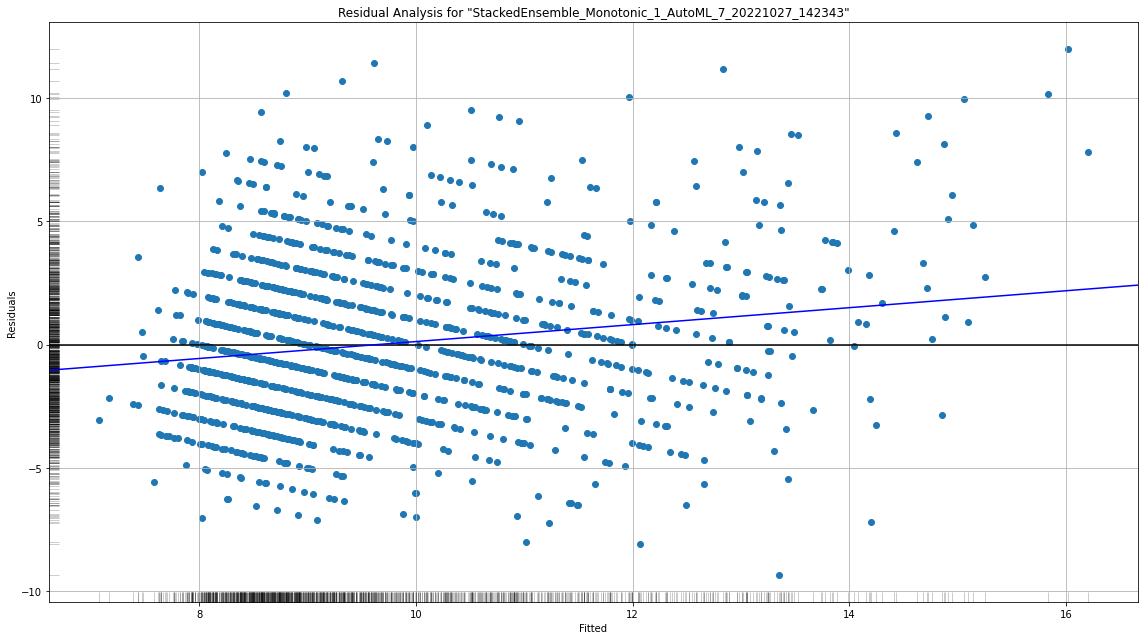

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

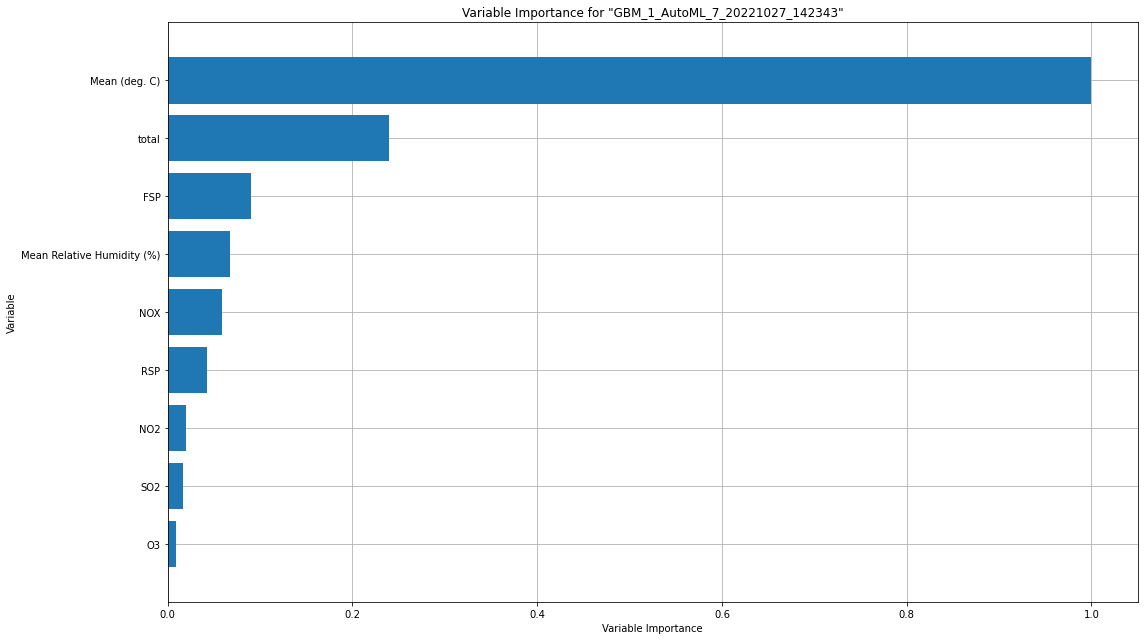

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

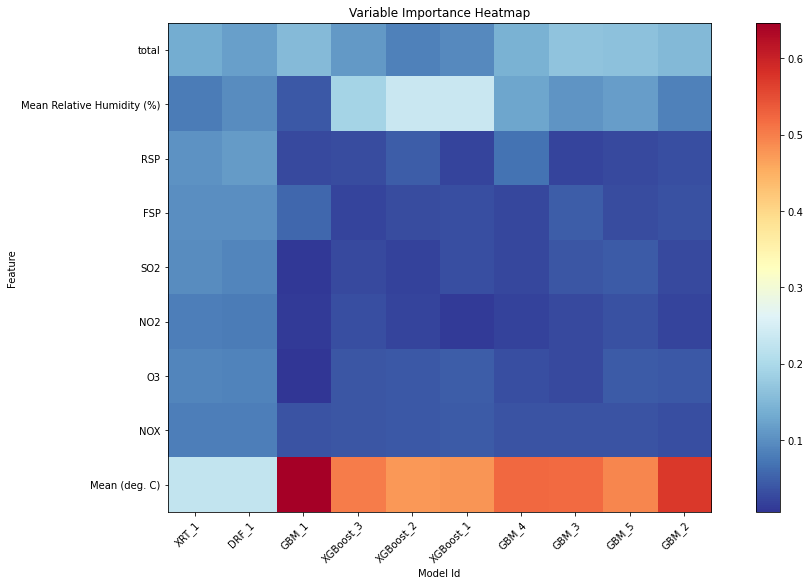

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

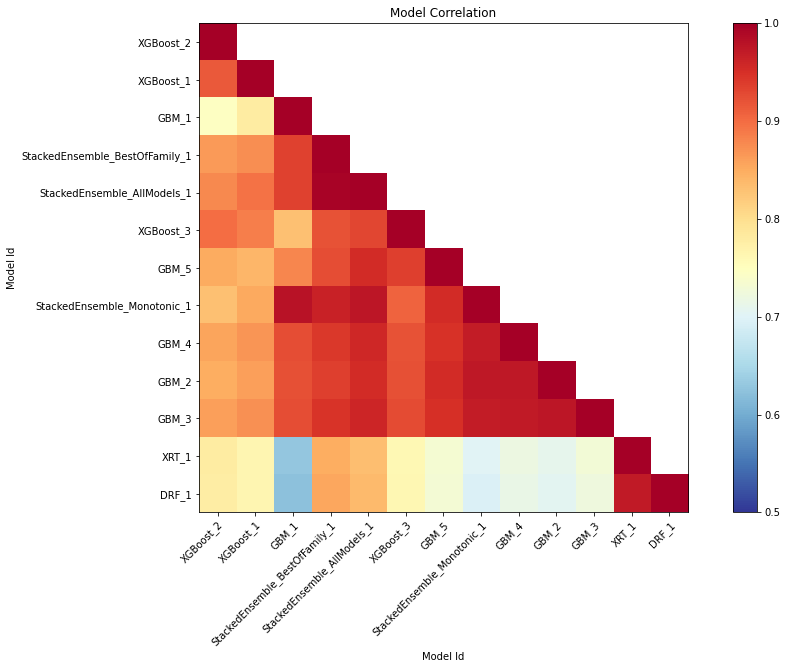

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

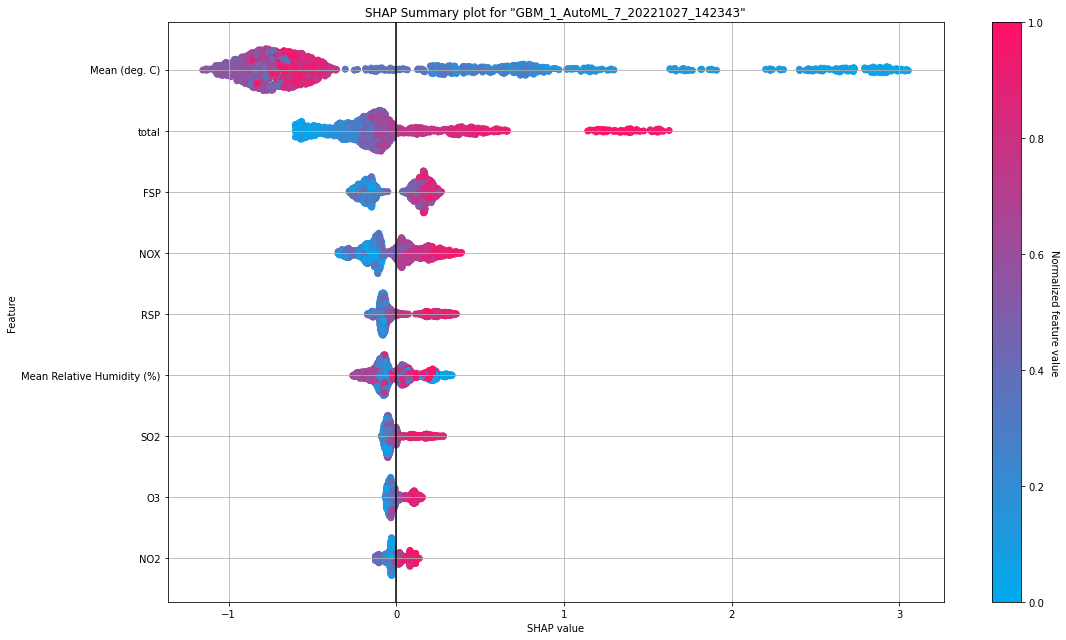

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

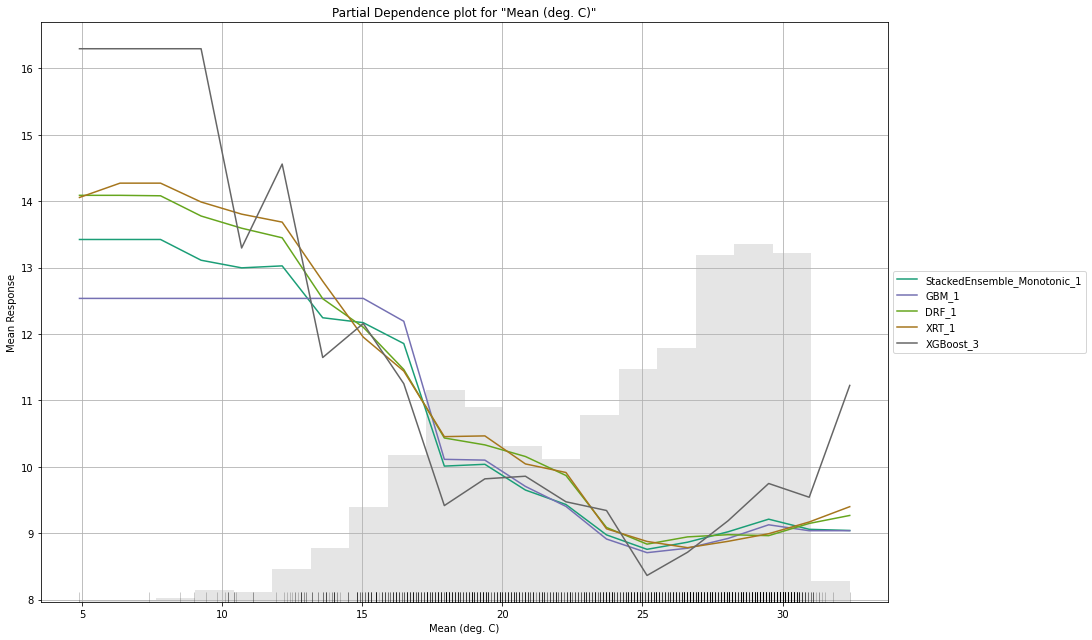

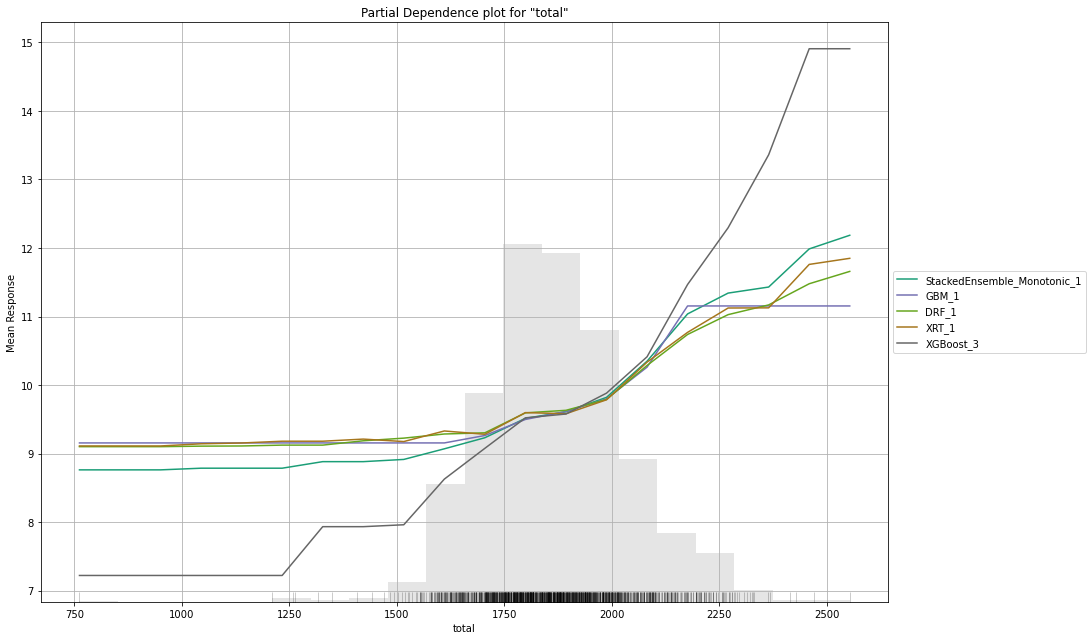

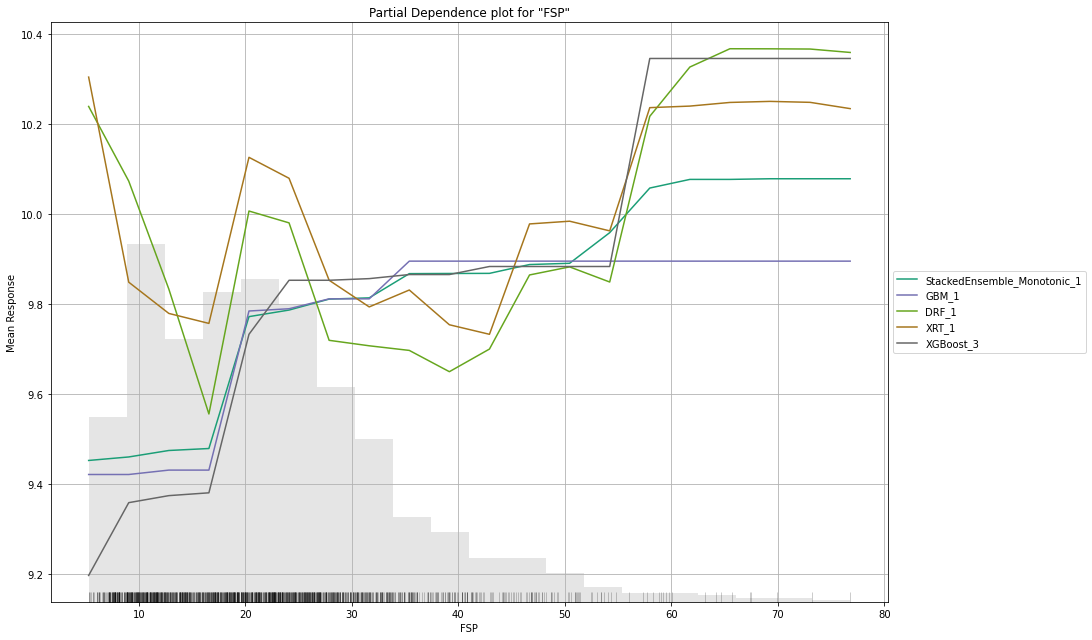

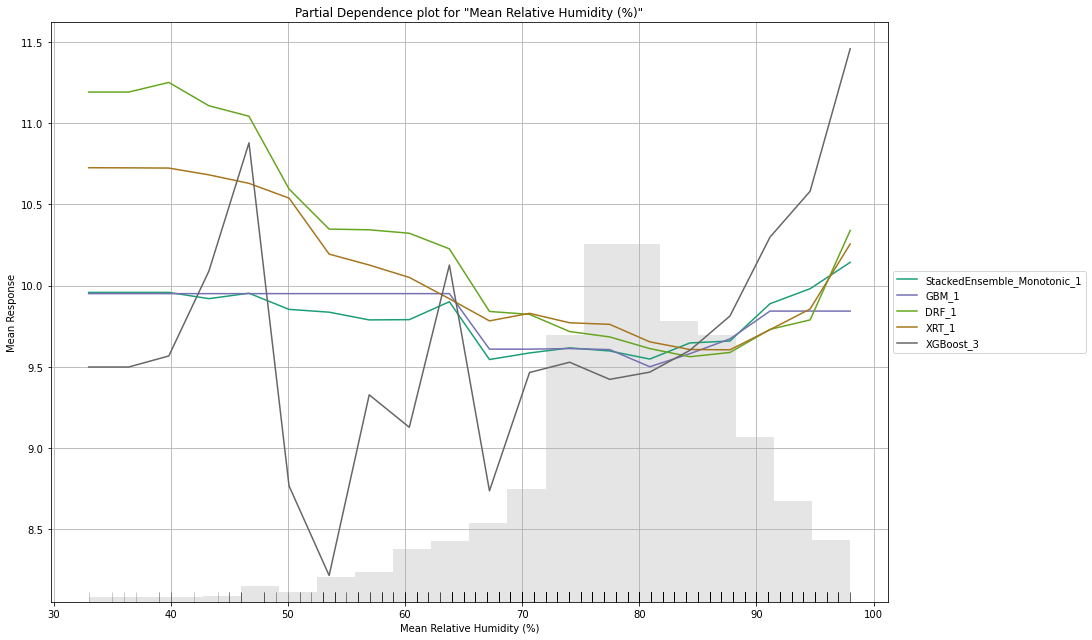

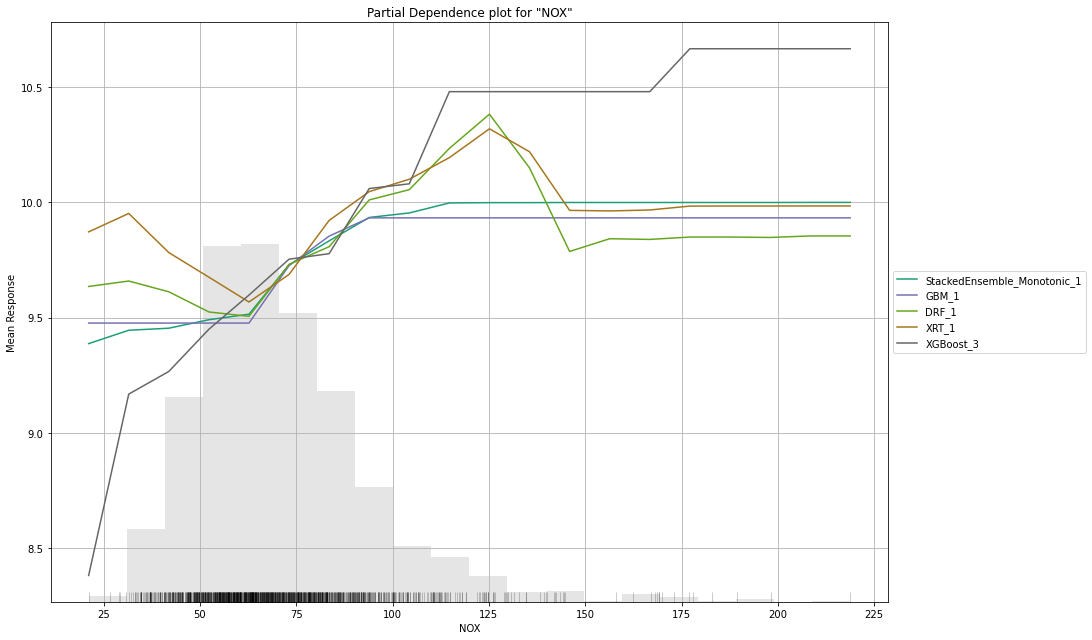

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

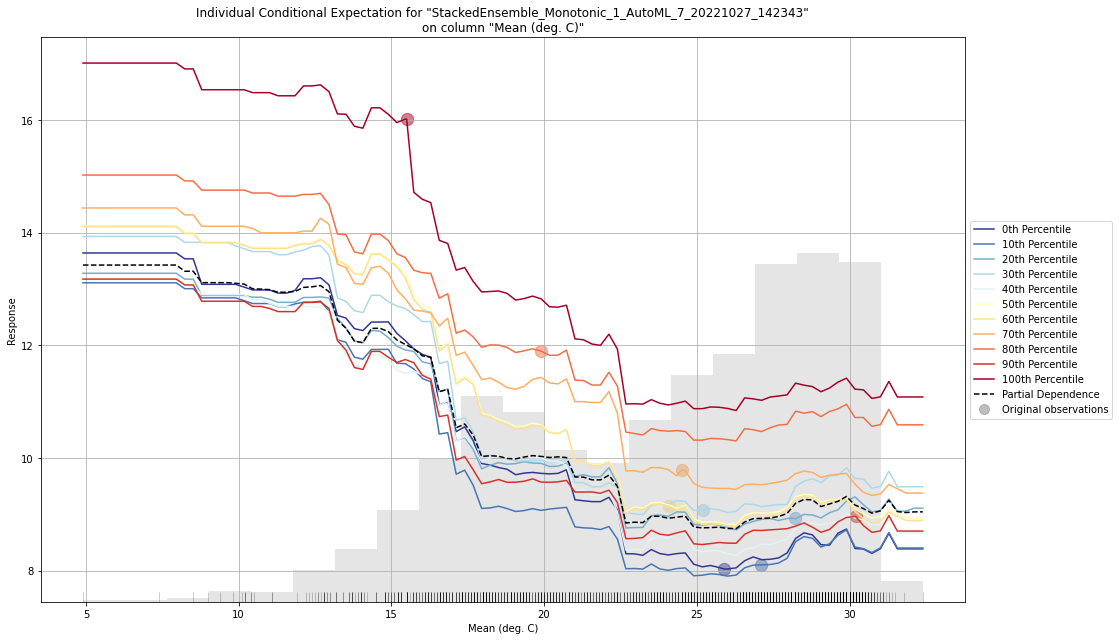

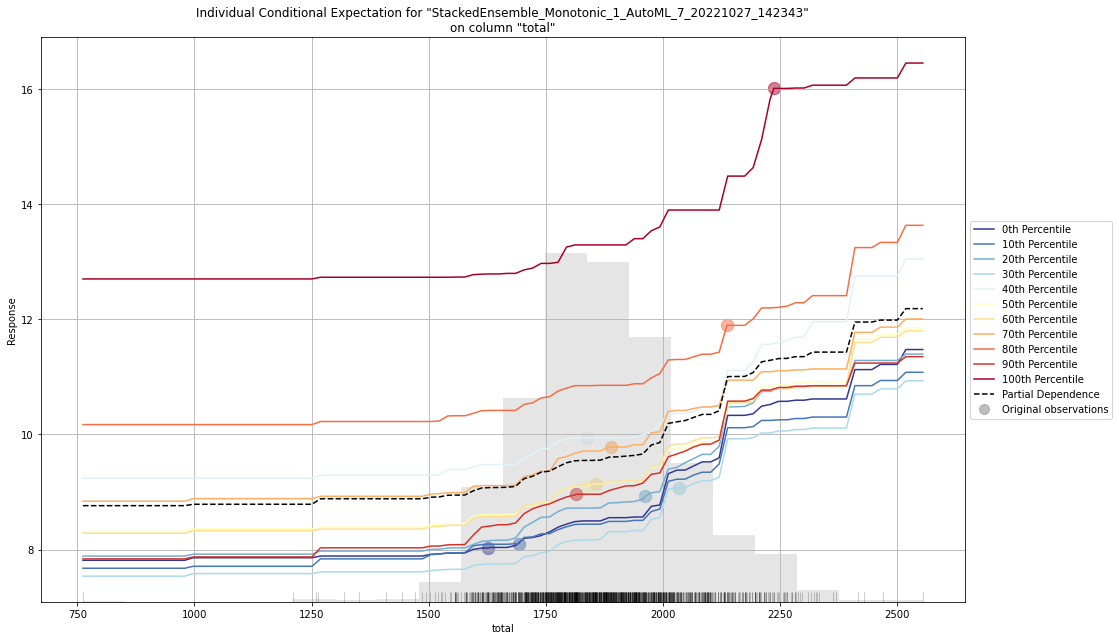

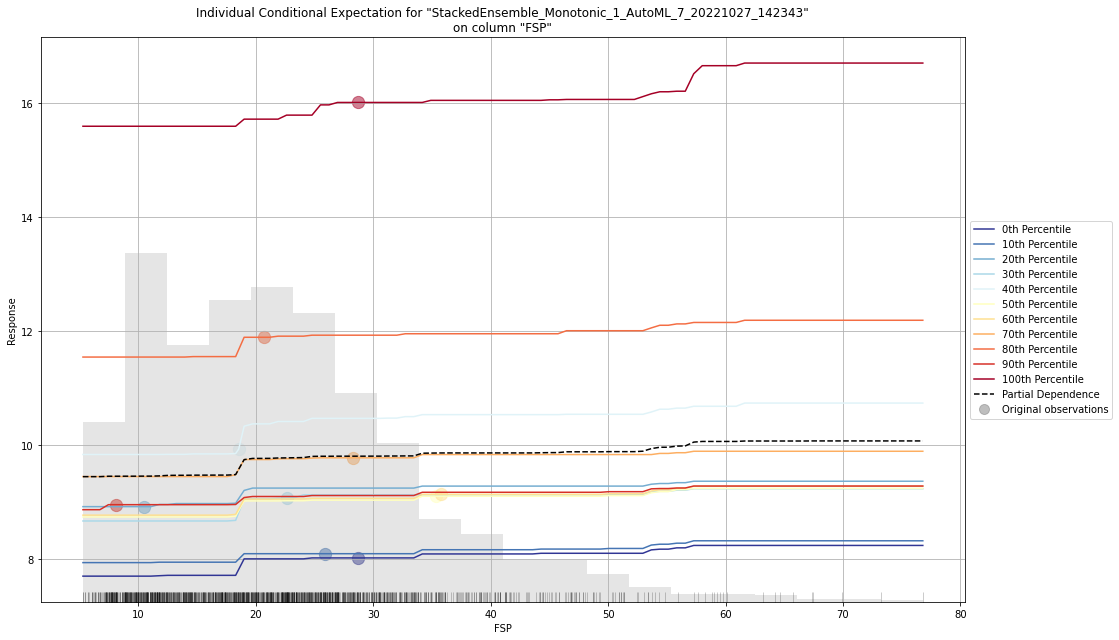

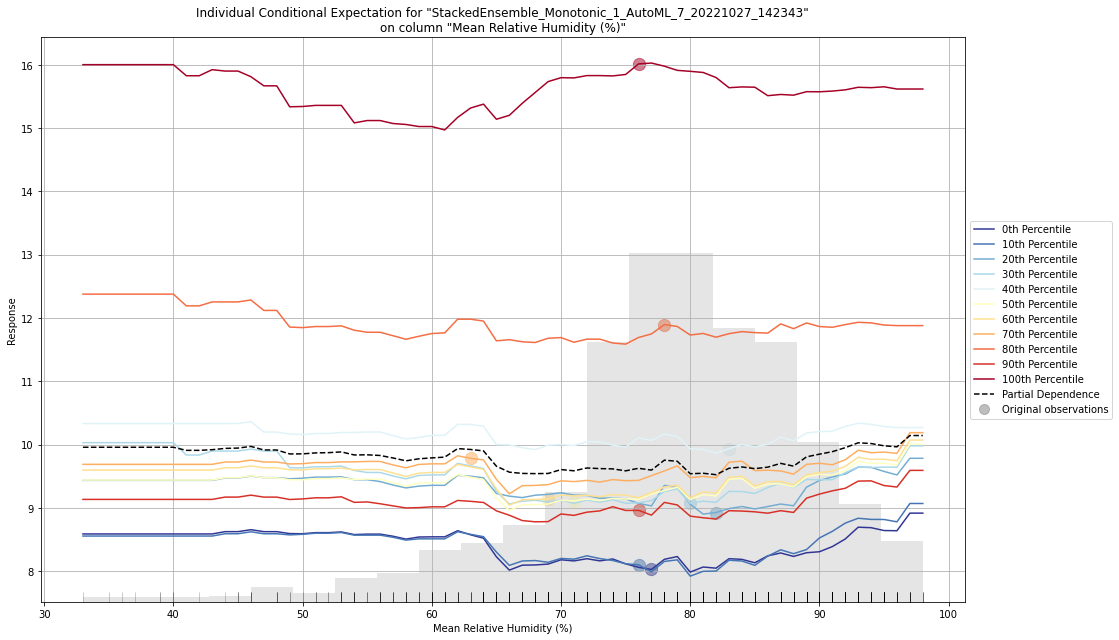

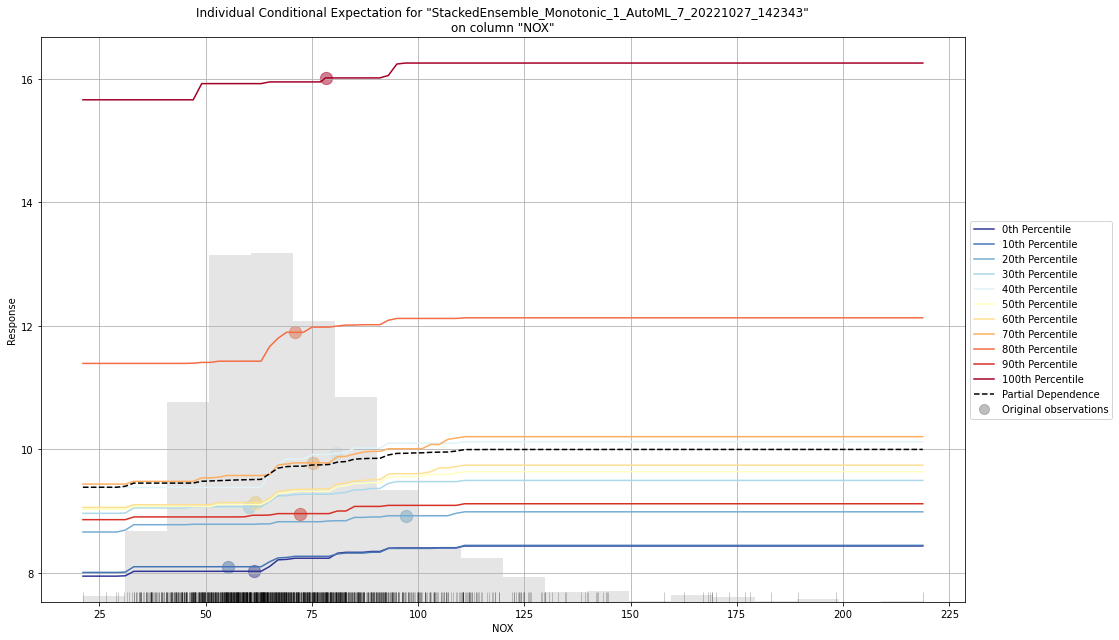

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_Monotonic_1_AutoML_7_20221027_142343,3.45038,11.9051,2.71696,0.338916,11.9051,123,0.007701,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_7_20221027_142343,3.45705,11.9512,2.71772,0.339476,11.9512,233,0.018964,StackedEnsemble
GBM_1_AutoML_7_20221027_142343,3.4588,11.9633,2.72281,0.339045,11.9633,51,0.004361,GBM
GBM_2_AutoML_7_20221027_142343,3.46567,12.0109,2.71921,0.339512,12.0109,44,0.004089,GBM
GBM_5_AutoML_7_20221027_142343,3.47085,12.0468,2.73021,0.340056,12.0468,57,0.003779,GBM
StackedEnsemble_BestOfFamily_1_AutoML_7_20221027_142343,3.4713,12.0499,2.72467,0.340002,12.0499,233,0.013861,StackedEnsemble
GBM_3_AutoML_7_20221027_142343,3.47701,12.0896,2.72356,0.340095,12.0896,44,0.004072,GBM
GBM_4_AutoML_7_20221027_142343,3.47902,12.1035,2.7229,0.340511,12.1035,61,0.004134,GBM
DRF_1_AutoML_7_20221027_142343,3.53761,12.5147,2.77334,0.346038,12.5147,280,0.012999,DRF
XRT_1_AutoML_7_20221027_142343,3.56563,12.7137,2.79381,0.34858,12.7137,329,0.011917,DRF


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [92]:
h2o.explain(aml, df)

In [20]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20221028_102406,5.7541,33.1096,4.60001,0.203388,33.1096
StackedEnsemble_BestOfFamily_1_AutoML_1_20221028_102406,5.77162,33.3116,4.61104,0.203976,33.3116
GBM_2_AutoML_1_20221028_102406,5.78844,33.506,4.61413,0.204204,33.506
GBM_5_AutoML_1_20221028_102406,5.78862,33.5082,4.6276,0.204314,33.5082
StackedEnsemble_Monotonic_1_AutoML_1_20221028_102406,5.78866,33.5086,4.6178,0.204339,33.5086
GBM_3_AutoML_1_20221028_102406,5.79712,33.6065,4.60702,0.204587,33.6065
GBM_1_AutoML_1_20221028_102406,5.79996,33.6395,4.63244,0.204398,33.6395
GBM_4_AutoML_1_20221028_102406,5.83455,34.0419,4.63979,0.205816,34.0419
DRF_1_AutoML_1_20221028_102406,5.89128,34.7072,4.71542,0.208257,34.7072
XRT_1_AutoML_1_20221028_102406,5.90426,34.8603,4.71293,0.20876,34.8603


In [21]:
m = h2o.get_model(lb[2,"model_id"])

In [22]:
# best_model = aml.get_best_model()
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Mean (deg. C),95912.523438,1.000000,0.432594
1,total,59312.007812,0.618397,0.267515
2,SO2,13896.669922,0.144889,0.062678
3,Mean Relative Humidity (%),13135.256836,0.136950,0.059244
4,NOX,9348.298828,0.097467,0.042164
5,NO2,9044.920898,0.094304,0.040795
6,FSP,8637.480469,0.090056,0.038958
7,RSP,7493.524414,0.078129,0.033798
8,O3,4934.284668,0.051446,0.022255


# dilated CNN

In [120]:
data_inclusion = "no pol"
# data_inclusion = "everything"
df = pd.read_csv("./raw_data/df.stroke.elderly.daily.csv")

In [121]:
if data_inclusion == "everything":

    df = df[df["ischemic"] == 1]
    df = df.drop(["Unnamed: 0", "year", "month", "Day", "Attendance.Date..yyyy.mm.dd.", "ischemic"], axis = 1)
    df.dtypes

# without air pollution

In [122]:
if data_inclusion == "no pol":
    df = df[df["ischemic"] == 1]
    df = df.drop(["Unnamed: 0", "year", "month", "Day", "Attendance.Date..yyyy.mm.dd.", "ischemic"], axis = 1)
    df = df.drop(["FSP", "NO2", "NOX", "O3", "RSP", "CO", "SO2"], axis = 1)
    df.dtypes

In [123]:
# # scaling fit with train-test split consideration to avoid data leakage
# # may need verification
# from sklearn.preprocessing import StandardScaler, Normalizer

# number of time steps for sequence learning
n_steps_x = 14
# number of time steps for sequence prediction
n_steps_y = 7

# split_at = int(len(df) * .8)
# val_split_at = int(len(df) * .9)


# scaler = StandardScaler()
# # if including air pollution data
# # fit by training set only
# df.iloc[:(split_at + n_steps_x + n_steps_y),1:] = scaler.fit_transform(
#     df.iloc[:(split_at + n_steps_x + n_steps_y),1:])
# # only transform valid and testing sets
# df.iloc[(split_at + n_steps_x + n_steps_y):,1:] = scaler.transform(
#     df.iloc[(split_at + n_steps_x + n_steps_y):,1:])

In [124]:
def reshape_sliding1(X, num_steps_x = 2, num_steps_y = 2):
    X = pd.DataFrame(X)
    X_transformed = [np.array(X.shift(i)) for i in range(num_steps_x + num_steps_y)]
    X_transformed = np.dstack(X_transformed)
    
    # swap time steps and dimensionality axes
    X_transformed = np.swapaxes(X_transformed, 1, 2)
    # flip time steps axis
    X_transformed = np.flip(X_transformed, 1)
    X_transformed = X_transformed[(num_steps_x+num_steps_y - 1):]
    return X_transformed

In [125]:

df = reshape_sliding1(df, 
                                       num_steps_x = n_steps_x,
                                      num_steps_y = n_steps_y)

In [126]:
# train_test_split 
# ignore prevalence
X_train = df[:split_at, :n_steps_x, :]
X_valid = df[split_at:val_split_at, :n_steps_x, :]
X_test = df[val_split_at:, :n_steps_x, :]

Y = np.empty((df.shape[0], n_steps_x, n_steps_y))
for step_ahead in range(1, n_steps_y + 1):
    print(step_ahead, step_ahead + n_steps_x)
    Y[..., step_ahead - 1] = df[..., step_ahead:step_ahead + n_steps_x, 0]
Y_train = Y[:split_at]
Y_valid = Y[split_at:val_split_at]
Y_test = Y[val_split_at:]

1 15
2 16
3 17
4 18
5 19
6 20
7 21


In [127]:
Y_test.shape

(236, 14, 7)

In [128]:
# # # optional
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [129]:
# checking dimensionality
print(X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape)
assert X_train.shape[1:] == X_valid.shape[1:]
assert Y_train.shape[1:] == Y_valid.shape[1:]

(2045, 14, 3) (2045, 14, 7) (256, 14, 3) (256, 14, 7)


# modelling
1. as of 23rd aug 2022: rnn loss nan problem <br>
possible remedies: normalize data, regularization, increase batch size <br>
https://datascience.stackexchange.com/questions/68331/keras-sequential-model-returns-loss-nan <br>
2. as of 24th aug 2022: try to add overall AE visit to include hospital avoidance effect
3. as of 25th aug 2022: corrected reshaping problem, performance is still shit, try remove air pollution, try larger learning rate
4. as of 26th aug 2022: try seq2seq model, it worked 
5. from the results it seems most contributing factor is total AE trend 


In [130]:
from tensorflow import keras
import tensorflow as tf

In [131]:
optimizer = keras.optimizers.Adam(clipvalue = 1)

In [132]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [144]:
model = "gru"

In [145]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

if model == "dilated cnn":
    # simplified wavenet
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = [None, X_train.shape[2]]))
    for rate in (1, 2, 4, 8, 16) * 2:
        model.add(keras.layers.Conv1D(filters = 100, kernel_size = 2, padding = "causal",
                                     activation = "relu", dilation_rate = rate))
    model.add(keras.layers.Conv1D(filters = Y_train.shape[2], kernel_size = 1))
    # reshape 
    # outputs_1d = Lambda(lambda x: tf.squeeze(x))(outputs)
    # model.add(keras.layers.Lambda(lambda x: tf.squeeze(x)))
    # model.add(keras.layers.Lambda(lambda x: tf.reshape(x, [-1, 14])))
    # model.add(keras.layers.Reshape((None, None), input_shape = model.output_shape))
    model.compile(loss = "mse", optimizer = optimizer, metrics = [last_time_step_mse])

In [146]:
if model == "gru":
    model = keras.models.Sequential([
        keras.layers.GRU(100, return_sequences=True, input_shape=[None, X_train.shape[2]]),
        keras.layers.GRU(150, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(Y_train.shape[2]))
    ])

    model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])

In [147]:
history = model.fit(X_train, Y_train, epochs=30,
                    validation_data=(X_valid, Y_valid),
                    callbacks = [callback]
                   )

Epoch 1/30
64/64 [==============================] - 5s 27ms/step - loss: 319.4547 - last_time_step_mse: 309.4723 - val_loss: 128.4933 - val_last_time_step_mse: 127.0886
Epoch 2/30
64/64 [==============================] - 1s 14ms/step - loss: 92.2049 - last_time_step_mse: 91.0438 - val_loss: 39.5478 - val_last_time_step_mse: 39.7617
Epoch 3/30
64/64 [==============================] - 1s 14ms/step - loss: 40.7968 - last_time_step_mse: 40.3318 - val_loss: 26.4821 - val_last_time_step_mse: 26.6876
Epoch 4/30
64/64 [==============================] - 1s 15ms/step - loss: 32.5125 - last_time_step_mse: 32.2723 - val_loss: 26.3285 - val_last_time_step_mse: 26.5228
Epoch 5/30
64/64 [==============================] - 1s 17ms/step - loss: 31.6705 - last_time_step_mse: 31.4783 - val_loss: 26.7334 - val_last_time_step_mse: 26.9237
Epoch 6/30
64/64 [==============================] - 1s 17ms/step - loss: 31.6116 - last_time_step_mse: 31.4330 - val_loss: 26.8824 - val_last_time_step_mse: 27.0716
Epoch 

In [137]:
# inference 
import matplotlib.pyplot as plt

In [138]:

pred = model.predict(X_test)

In [139]:
assert pred.shape == Y_test.shape

In [140]:
print(pred.shape)

(236, 14, 7)


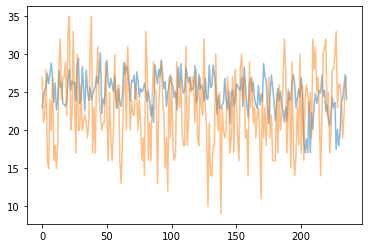

In [141]:
plt.plot(np.double(pred[:, 0, -1]).flatten(), alpha = .5)
plt.plot(np.double(Y_test[:, 0, -1]).flatten(), alpha = .5)

In [142]:
pred = model.predict(X_valid)

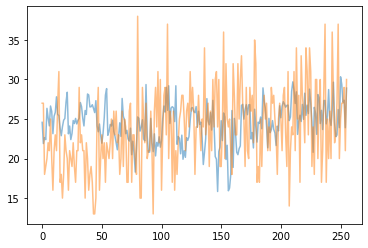

In [143]:
plt.plot(np.double(pred[:, 0, -1]).flatten(), alpha = .5)
plt.plot(np.double(Y_valid[:, 0, -1]).flatten(), alpha = .5)